In [21]:
import statistics
%pip install numpy
import numpy as np
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Sample Plot')

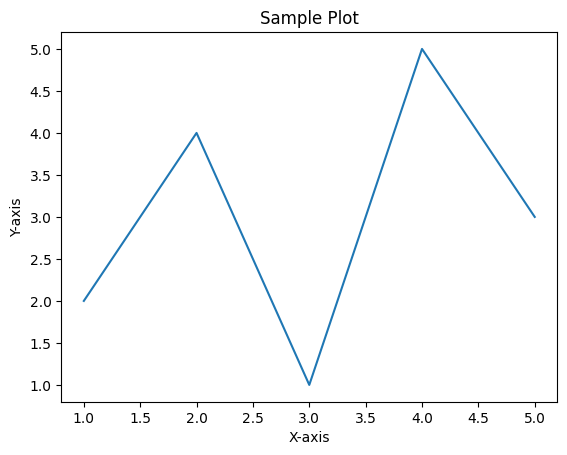

In [2]:
import matplotlib.pyplot as plt

# The magic command - Must be on its own line
%matplotlib inline 

# Create some sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Create a simple plot
plt.plot(x, y)

# Add labels and title (optional, but good practice)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample Plot")

# Display the plot -  Not strictly needed with %matplotlib inline
# plt.show()

In [ ]:


df=sns.load_dataset('tips')

In [10]:
df.head()
df.describe()
statistics.mode(df['total_bill'])

13.42

<Axes: xlabel='day', ylabel='total_bill'>

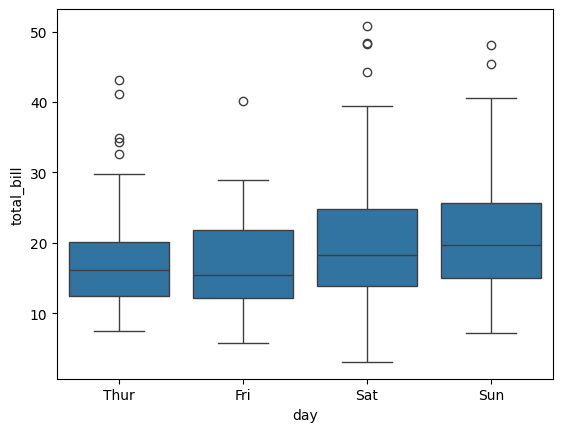

In [12]:
sns.boxplot(x='day', y='total_bill', data=df)

<Axes: xlabel='total_bill'>

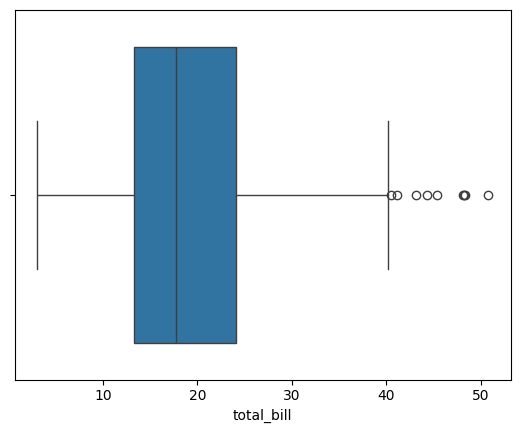

In [17]:
sns.boxplot(df['total_bill'] ,orient='h')

<Axes: xlabel='total_bill', ylabel='Count'>

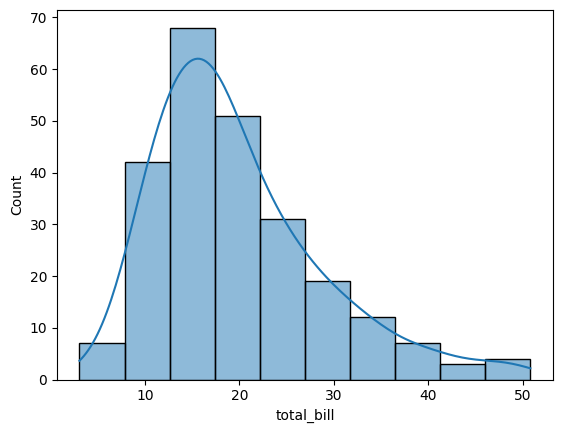

In [18]:
sns.histplot(df['total_bill'], bins=10, kde=True)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

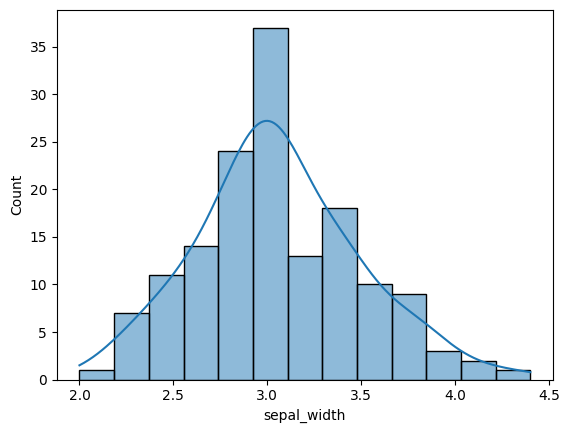

In [27]:
df2=sns.load_dataset('iris')
print(df2.head())
sns.histplot(df2['sepal_width'], kde=True)


<Axes: xlabel='petal_length', ylabel='Count'>

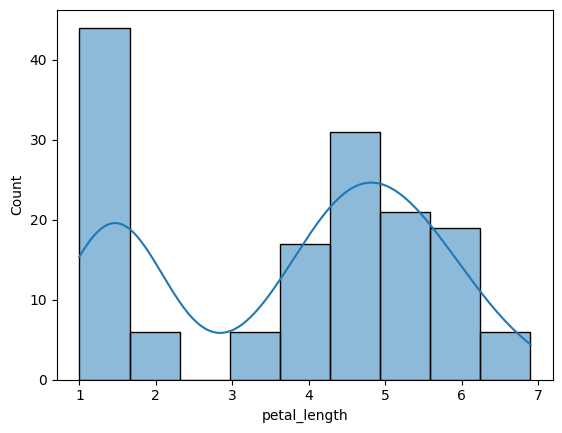

In [28]:
sns.histplot(df2['petal_length'], kde=True)

In [1]:
###  Outliers

In [5]:
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
list_length = len(dataset)
print(list_length)  # Output: 5

34


In [16]:
outliers = []
def detect_outlier(data_1):
    
    threshold=3 ## 3 standard deviation
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers 

outlier_datapoints = detect_outlier(dataset)
print(outliers)

[102, 107, 108]


(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

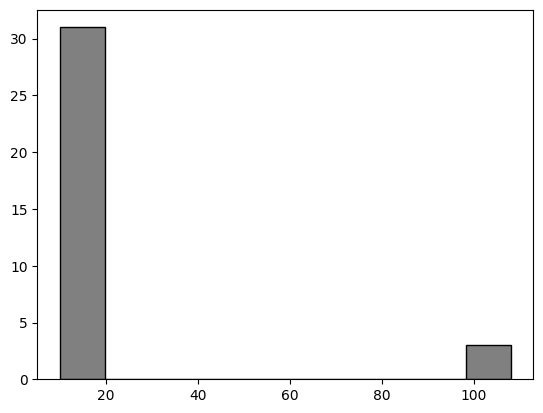

In [17]:

plt.hist(dataset, bins=10, color='grey', edgecolor='black')

In [19]:
#IQR
dataset.sort()
print(dataset)
q1, q3= np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 - q1
print(iqr)
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print(lower_bound,upper_bound)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]
12.0 15.0
3.0
7.5 19.5


<Axes: >

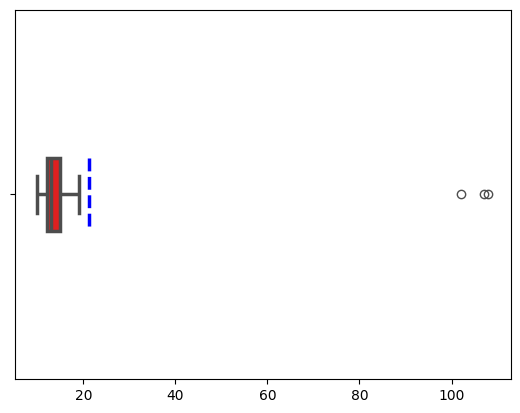

In [25]:
sns.boxplot(dataset,orient='h',color='red',width=0.2,linewidth=2.5,whis=1.5,showmeans=True,meanline=True,meanprops={'color':'blue','linewidth':2.5})